In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
color_base,cent_color=['turquoise','darkcyan','dodgerblue','blue','orange','green','grey','darkviolet'],'red'
def k_means(cluster_k):
    data=pd.read_csv("cdata.csv").sample(frac=1).reset_index(drop=True)
    center_data,i3,SSE,cent_d={},3,0,{}
    center_data['cent1']=(data.iloc[0][0],data.iloc[0][1])
    c2=(((data['x']-data.iloc[0][0])**2+(data['y']-data.iloc[0][1])**2)**0.5)
    center_data['cent2']=(data.iloc[c2.idxmax()][0],data.iloc[c2.idxmax()][1])
    for i3 in range(3,cluster_k+1):
        name,cent_d='cent'+str(i3),{}
        for c in list(center_data.keys()):
            cent_d[c]=((data['x']-center_data[c][0])**2+(data['y']-center_data[c][1])**2)**0.5
        c_po=pd.DataFrame(cent_d).min(axis=1).idxmax()
        center_data[name]=(data.iloc[c_po][0],data.iloc[c_po][1])
    while True:
        for c in list(center_data.keys()):
            cent_d[c]=((data['x']-center_data[c][0])**2+(data['y']-center_data[c][1])**2)**0.5
        data_centroid_belong,data['cluster']={},pd.DataFrame(cent_d).idxmin(axis='columns')
        data['cluster']=pd.DataFrame(cent_d).idxmin(axis='columns')
        cent_group=data.groupby(data.cluster)
        for i in cent_group:
            data_centroid_belong[i[0]]=list(zip(list(i[1]['x']),list(i[1]['y'])))
        new_center_data={}
        for i in list(cent_group.aggregate(pd.DataFrame.mean).index):
            new_center_data[i]=(cent_group.aggregate(pd.DataFrame.mean).loc[i]['x'],cent_group.aggregate(pd.DataFrame.mean).loc[i]['y'])
        if new_center_data==center_data:
            break
        else:
            center_data=new_center_data
    for i in data.groupby(data.cluster):
        SSE+=((i[1]['x']-center_data[i[0]][0])**2+(i[1]['y']-center_data[i[0]][1])**2).sum()
    return data_centroid_belong,center_data,SSE

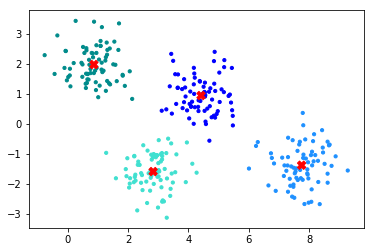

In [2]:
#question 1
data_cent_belong4,cent_data4,SSE4=k_means(4)
for i in list(data_cent_belong4.keys()):
    x_axis,y_axis=[],[]
    for j in data_cent_belong4[i]:
        x_axis.append(j[0])
        y_axis.append(j[1])
    plt.scatter(x_axis,y_axis,sizes=[10]*len(x_axis),c=color_base[int(i[-1])-1])
cent_x,cent_y=[],[]
for i in list(cent_data4.values()):
    cent_x.append(float(i[0]))
    cent_y.append(float(i[1]))
plt.scatter(cent_x,cent_y,c=cent_color,sizes=[70]*len(cent_x),marker='X',label='Central')
plt.show()

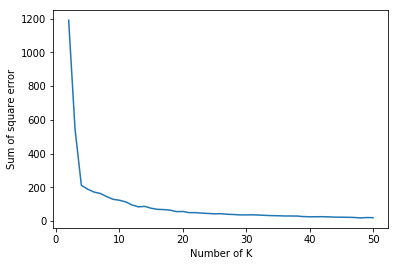

In [3]:
#question 2
SSE_list=[]
for i in range(2,51):
    SSE_list.append(k_means(i)[2])
xk=np.arange(2,51,1)
plt.plot(xk,SSE_list)
plt.xlabel('Number of K')
plt.ylabel('Sum of square error')
plt.show()

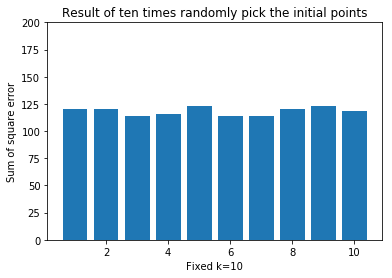

In [4]:
#question 3
SSE10_list=[]
for i in range(10):
    SSE10_list.append(k_means(10)[2])
xk10=np.arange(1,11,1)
plt.bar(xk10,SSE10_list)
plt.title('Result of ten times randomly pick the initial points')
plt.xlabel('Fixed k=10')
plt.ylabel('Sum of square error')
plt.ylim(0,200)
plt.show()